In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import pylab as pl

In [4]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
path = r'C:\Users\pookybubu\Hotel booking demand'

In [6]:
df = pd.read_csv(r'C:\Users\pookybubu\Hotel booking demand\02 Data\Prepared Data\hotel_booking_new_3.csv', index_col = False)

In [7]:
df.head()

,Unnamed: 0,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Country,Total_guests,adr_pp,reservation_status_month,total_nights,guest_category
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,0,0,Check-Out,2015-07-01,Portugal,2,0.0,7,0,couple
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,0,0,Check-Out,2015-07-01,Portugal,2,0.0,7,0,couple
2,2,Resort Hotel,0,0,2015,July,27,1,0,2,...,0,0,Check-Out,2015-07-03,Portugal,2,53.5,7,2,couple
3,3,Resort Hotel,0,9,2015,July,27,1,0,2,...,0,1,Check-Out,2015-07-03,Portugal,2,51.5,7,2,couple
4,4,Resort Hotel,1,85,2015,July,27,1,0,3,...,0,1,Canceled,2015-05-06,Portugal,2,41.0,5,3,couple


In [8]:
# drop unname columns for df
df = df.drop(columns = ['Unnamed: 0'])

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Country,Total_guests,adr_pp,reservation_status_month,total_nights,guest_category
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,2,0.0,7,0,couple
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,2,0.0,7,0,couple
2,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,0,0,0,Transient,107.0,0,0,Check-Out,2015-07-03,Portugal,2,53.5,7,2,couple
3,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303,0,0,Transient,103.0,0,1,Check-Out,2015-07-03,Portugal,2,51.5,7,2,couple
4,Resort Hotel,1,85,2015,July,27,1,0,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,82.0,0,1,Canceled,2015-05-06,Portugal,2,41.0,5,3,couple


In [11]:
# look for rate that is greater than 1000
df[df["average_daily_rate"]> 1000.0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Country,Total_guests,adr_pp,reservation_status_month,total_nights,guest_category
22141,City Hotel,1,35,2016,March,13,25,0,1,2,0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,1,Non Refund,12,0,0,Transient,5400.0,0,0,Canceled,2016-02-19,Portugal,2,2700.0,2,1,couple


In [12]:
# drop the row with rate > 1000
df_2 = df.drop([22141])

### If guest has long lead time, then guest tends to make more booking changes.

In [13]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2['lead_time'].values.reshape(-1,1)
y = df_2['booking_changes'].values.reshape(-1,1)

In [14]:
# Split data into a training set and a test set.  Using test_train_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [15]:
# Create regression object
regression = LinearRegression()

In [16]:
# Fit the regression to the training set of each variable.  This trains the model.
regression.fit(X_train, y_train)

LinearRegression()

In [17]:
# Apply model to x_test data to predict y values
y_predicted = regression.predict(X_test)

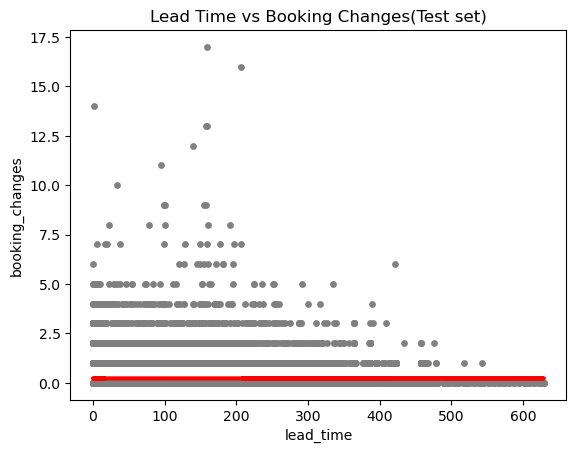

In [18]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Lead Time vs Booking Changes(Test set)')
plot_test.xlabel('lead_time')
plot_test.ylabel('booking_changes')
plot_test.show()

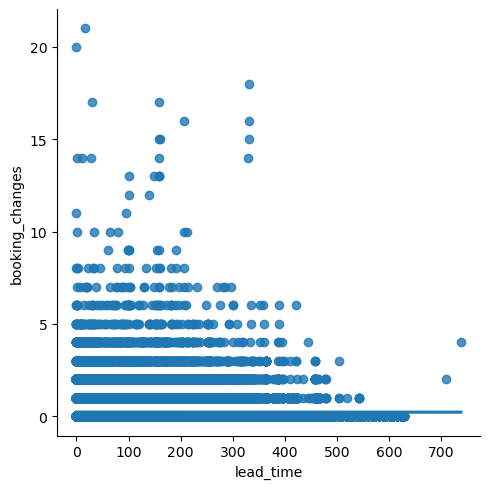

In [21]:
scatter_1 = sns.lmplot(x = 'lead_time', y = 'booking_changes', data = df_2)

The line does not fit the data very well. This can be seen by the distance of the data points to the line. Indicating we do not have a linear relationship between the variables.

### If guest book with higher daily rate then guests tend to make more booking changes.

In [19]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df_2['average_daily_rate'].values.reshape(-1,1)
y = df_2['booking_changes'].values.reshape(-1,1)

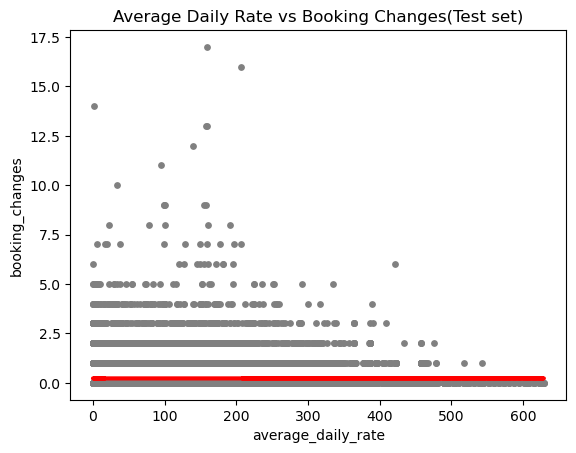

In [20]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Average Daily Rate vs Booking Changes(Test set)')
plot_test.xlabel('average_daily_rate')
plot_test.ylabel('booking_changes')
plot_test.show()

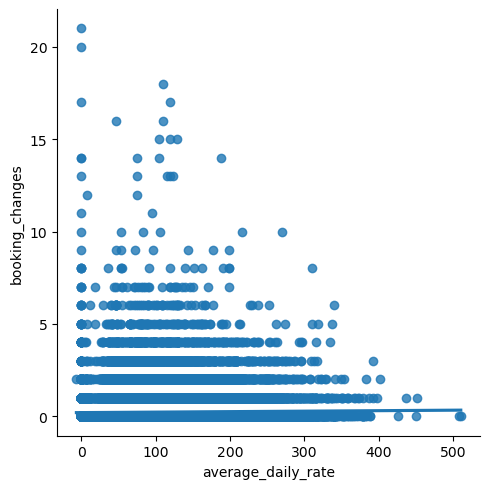

In [25]:
scatter_2 = sns.lmplot(x = 'average_daily_rate', y = 'booking_changes', data = df_2)

The line does not fit the data very well. This can be seen by the distance of the data points to the line. Indicating we do not have a linear relationship between the variables.

In [55]:
# create a subset with non-canceled bookings only
df_not_canceled = df_2[df_2['is_canceled'] == 0]

In [71]:
# Drop non numerical columns
df_num=df_not_canceled.drop(columns = ['hotel','arrival_date_month','meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','agent','customer_type','reservation_status','reservation_status_date','guest_category','Country', 'adr_pp'])

In [72]:
df_num

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,company,days_in_waiting_list,average_daily_rate,required_car_parking_spaces,total_of_special_requests,Total_guests,reservation_status_month,total_nights
0,0,342,2015,27,1,0,0,2,0,0,0,0,0,3,0,0,0.00,0,0,2,7,0
1,0,737,2015,27,1,0,0,2,0,0,0,0,0,4,0,0,0.00,0,0,2,7,0
2,0,0,2015,27,1,0,2,2,0,0,0,0,0,0,0,0,107.00,0,0,2,7,2
3,0,9,2015,27,1,0,2,2,0,0,0,0,0,0,0,0,103.00,0,1,2,7,2
7,0,35,2015,27,1,0,4,2,0,0,0,0,0,0,0,0,145.00,0,0,2,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117615,0,6,2017,24,11,2,1,2,0,0,0,0,0,0,0,0,99.00,0,1,2,6,3
117616,0,116,2017,27,2,2,0,2,0,0,0,0,0,0,0,0,126.00,0,0,2,7,2
117617,0,84,2017,30,27,2,5,2,0,0,0,0,0,0,0,0,121.43,0,1,2,8,7
117618,0,2,2017,32,9,0,3,2,0,0,0,0,0,0,0,0,183.33,0,1,2,8,3


In [73]:
df_num.isnull().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
company                           0
days_in_waiting_list              0
average_daily_rate                0
required_car_parking_spaces       0
total_of_special_requests         0
Total_guests                      0
reservation_status_month          0
total_nights                      0
dtype: int64

In [74]:
# Define the range of potential clusters in the data.
num_cl = range(1, 10)

# Define k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [75]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))] 
score

C:\Users\pookybubu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pookybubu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pookybubu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pookybubu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\pookybubu\anaconda3\lib\site-pa

[-1106972587.025288,
 -674277623.9043744,
 -456212177.7754524,
 -361951120.7819054,
 -279764509.13310903,
 -247846062.52122727,
 -221647867.0397526,
 -199283264.5327026,
 -178100432.89705682]

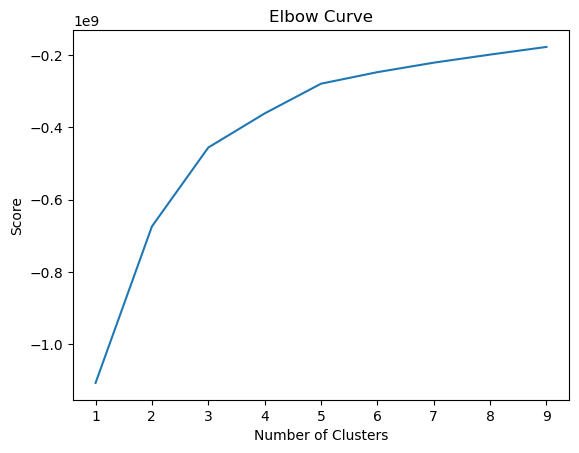

In [76]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Based on the elbow, the optimal number of clusters is 5. After value of 4 on the x-axis the curve flattens out.

In [77]:
# Create the k-means object.

kmeans = KMeans(n_clusters=5) 

In [78]:
# Fit the k-means object to the data.

kmeans.fit(df_num)

C:\Users\pookybubu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [79]:
# Create a column in the dataframe with values corresponding to which cluster every observation belongs

df_num['clusters'] = kmeans.fit_predict(df_num)

C:\Users\pookybubu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


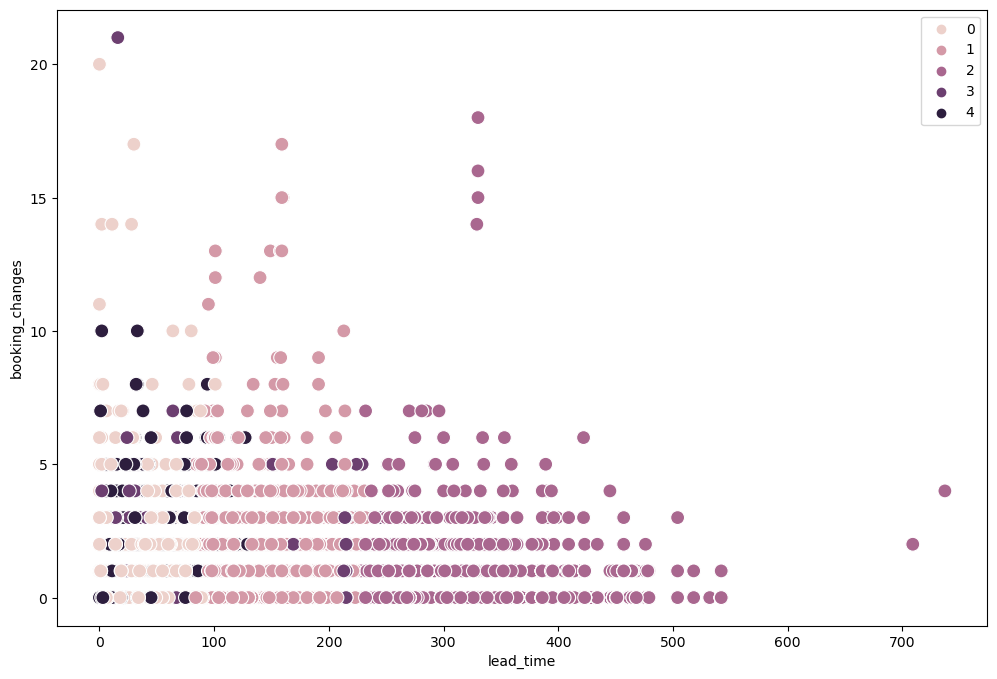

In [80]:
# Plot the clusters for the "lead time" and "booking changes" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_num['lead_time'], y = df_num['booking_changes'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('lead_time')
plt.ylabel('booking_changes')
plt.show()

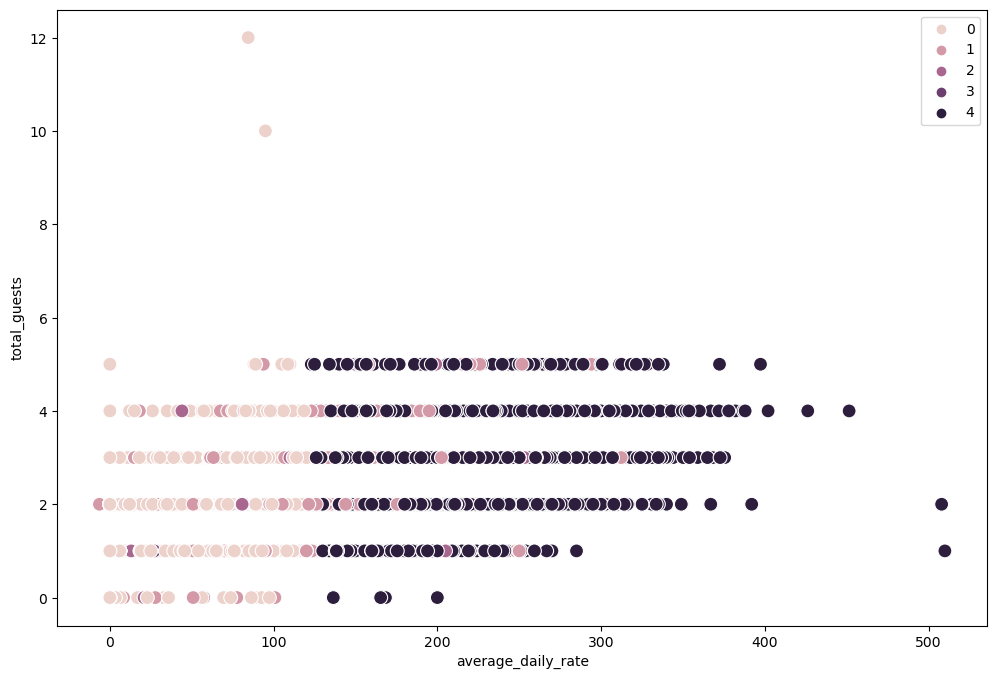

In [81]:
# Plot the clusters for the "average daily rate" and "total guest" variables

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_num['previous_cancellations'], y = df_num['Total_guests'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('average_daily_rate')
plt.ylabel('total_guests')
plt.show()

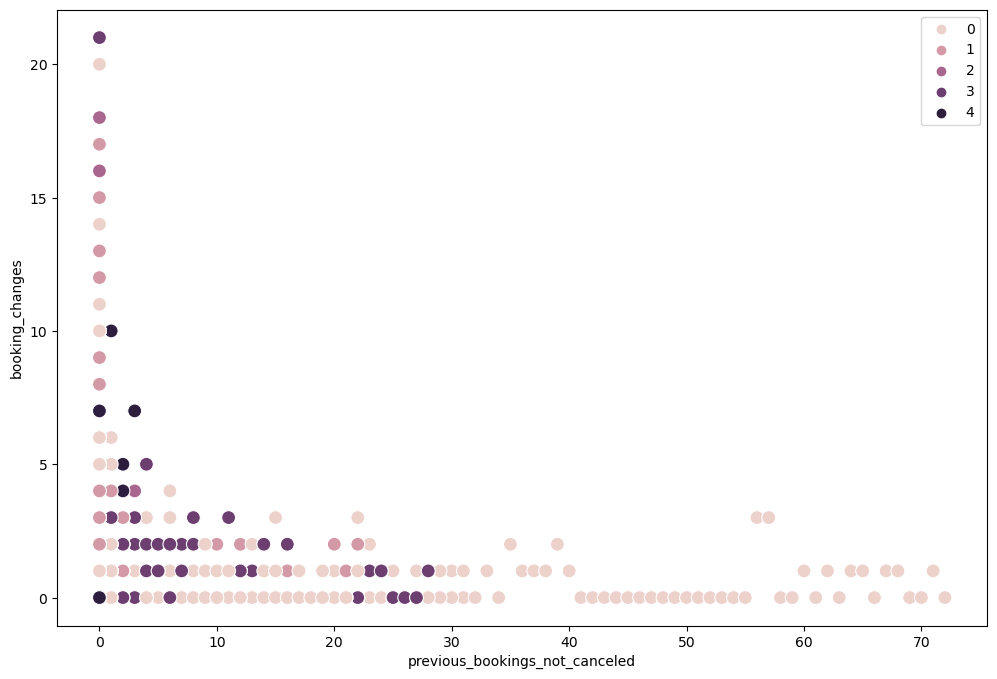

In [89]:
# Plot the clusters for the "previous_bookings_not_canceled" and "booking_changes" variables without outlier.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df_num['previous_bookings_not_canceled'], y = df_num['booking_changes'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('previous_bookings_not_canceled')
plt.ylabel('booking_changes')
plt.show()

1. The plot of "lead time" and "booking changes" 
 - There is no visible linear connection between these 2 variables. However, we can see the cluster coded as 1 and 2 in the legend are the most populated clusters. All the clusters coded as 1 and 2 are placed at lead time more than 100 days. This could mean the most lead time are more than 100 days. Moreover, all the clusters coded as 1 and 2 are placed at booking changes that are under 10, meaning with 100 days and more lead time, guests usually make no more than 10 changes to the bookings.
2. The plot of the "average daily rate" and "total guest"
 - The cluster coded as 4 is the most populated cluster and only represented at the total guest that are under 6 people and at the daily rate that is greater than 100.
3. The plot of the "previous_bookings_not_canceled" and "booking changes"
 - The cluster coded as 0 is the most populated cluster and only represented at the previous_bookings_not_canceled that are under 5. This could mean that most guests with no record of previous cancellation tend to make chages to the bookings less than 5. 

In [84]:
df_num.loc[df_num['clusters'] == 4, 'cluster'] = 'black'
df_num.loc[df_num['clusters'] == 3, 'cluster'] = 'dark purple'
df_num.loc[df_num['clusters'] == 2, 'cluster'] = 'purple'
df_num.loc[df_num['clusters'] == 1, 'cluster'] = 'pink'
df_num.loc[df_num['clusters'] == 0, 'cluster'] = 'light pink'

In [91]:
df_num.groupby('cluster').agg({'lead_time':['mean', 'median'], 
                              'booking_changes':['mean', 'median'], 
                              'average_daily_rate':['mean', 'median'],
                              'Total_guests':['mean', 'median'], 
                              'previous_bookings_not_canceled':['mean', 'median']})

lead_time        booking_changes        average_daily_rate  \
                   mean median            mean median               mean   
cluster                                                                    
black         33.178552   24.0        0.290976    0.0         166.954324   
dark purple   43.800129   11.0        0.593166    0.0          70.889642   
light pink    25.747512   16.0        0.226368    0.0          73.177899   
pink         147.421909  143.0        0.325672    0.0         102.706938   
purple       303.701066  287.0        0.427001    0.0          91.925016   

                    Total_guests        previous_bookings_not_canceled         
             median         mean median                           mean median  
cluster                                                                        
black        155.00     2.309287    2.0                       0.027501    0.0  
dark purple   70.00     1.364603    1.0                       0.914571    0.0  
light pink    75.00     1.780866    2.0                       0.330788    0.0  
pink          98.10     2.043393    2.0                       0.028463    0.0  
purple        90.76     1.945694    2.0                       0.020978    0.0